??? danger Vous êtes professeur ? Cliquez ici pour obtenir les ressources associées à ce notebook 
  
Ce notebook est conçu pour être utilisé avec des ressources (diaporama, fiche d'exercice et vidéo).

Retrouvez-les dans l'espace professeur du site [mathadata.fr](https://mathadata.fr/fr).

Pour tout retour, coquille, demande d'aide, critique, ou félicitations, contactez-nous sur [question-notebook@mathadata.fr](mailto:question-notebook@mathadata.fr).

Notebook exporté le 02-01-2026 14:21:27 
<!-- depuis le commit f05fd8b -->

???


# MathAData - Repérage dans le plan et distances


!!! abstract But du TP  : Classification des images de 2 et de 7
Dans ce Notebook, nous allons construire un algorithme qui prédit si un 2 ou un 7 est écrit sur une image.
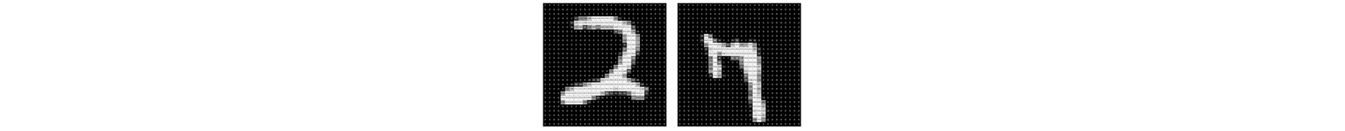  
!!!


!!! tip Exécuter une cellule  
Pour commencer, **clique dans la cellule** de code ci-dessous puis appuie dans la barre d'outils sur le bouton **Exécuter**
 <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">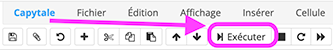</span>
ou sur les touches <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>.  
Lorsque le code aura été exécuté, une étoile apparaîtra le temps du chargement puis un nombre entre les crochets sur la gauche : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  
!!!


??? warning SOS : Rien ne se passe ? Clique ici  

### Rien ne se passe quand tu exécutes une cellule ?

**Cas 1 : La cellule n'a pas été exécutée.**  
Tu vois ceci : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">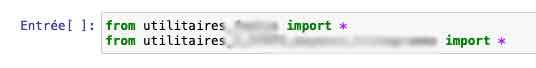</span>

**Solution :** Clique dans la cellule (sur le mot `from` par exemple) puis appuie sur le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">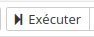</span>

---

**Cas 2 : La cellule est en cours d'exécution.**  
Tu vois ceci : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">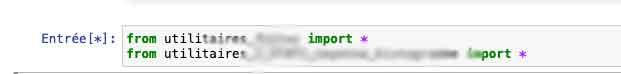</span>

**Solution :** La base de données se charge. Patiente jusqu'à une minute.

---

**Cas 3 : Rien ne fonctionne malgré les solutions ci-dessus ?**  

**Solution :** Relance le notebook depuis le début :

1. Clique sur le bouton **deux petites flèches** <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">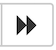</span> dans la barre d'outils en haut du notebook


2. Clique ensuite sur le bouton rouge **"Relancer et exécuter toutes les cellules"**
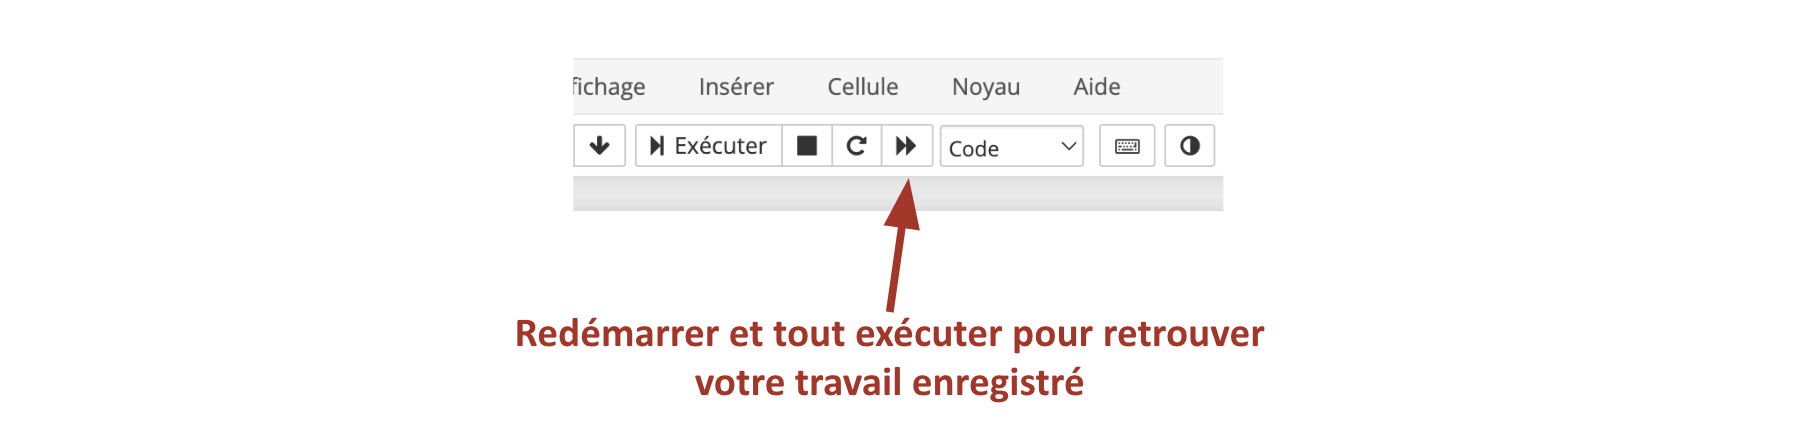  

???


In [ ]:
# Clique dans cette cellule de code puis appuie sur le bouton Exécuter dans la barre d'outils 

from utilitaires_mnist import *

<div id="debut-etape-bdd" style="height: 1px; visibility: hidden;"></div>


!!! tip Base de données  
Nous avons environ 6 000 images.  
**Exécute la cellule suivante** pour afficher la base de données. Tu peux cliquer sur une ligne pour afficher l'image correspondante et te déplacer avec les flèches haut et bas du clavier.  
!!!


In [ ]:
# Clique dans cette cellule de code puis appuie sur le bouton Exécuter
from utilitaires_S_GEO_milieu_distance import *
affichage_banque()
validation_execution()

!!! question 1) Parmi les 10 premières images, combien d'images de 7 y a-t-il  ?
 **Remplace les `...`** dans la cellule suivante par ta réponse **puis exécute**.  
!!!


In [ ]:
nombre_7 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_nombre()

<div id="debut-etape-depart" style="height: 1px; visibility: hidden;"></div>


## A. Algorithme de départ


!!! tip Fonctionnement d'un algorithme  
Un algorithme reçoit une donnée, effectue des opérations, et donne une réponse.  
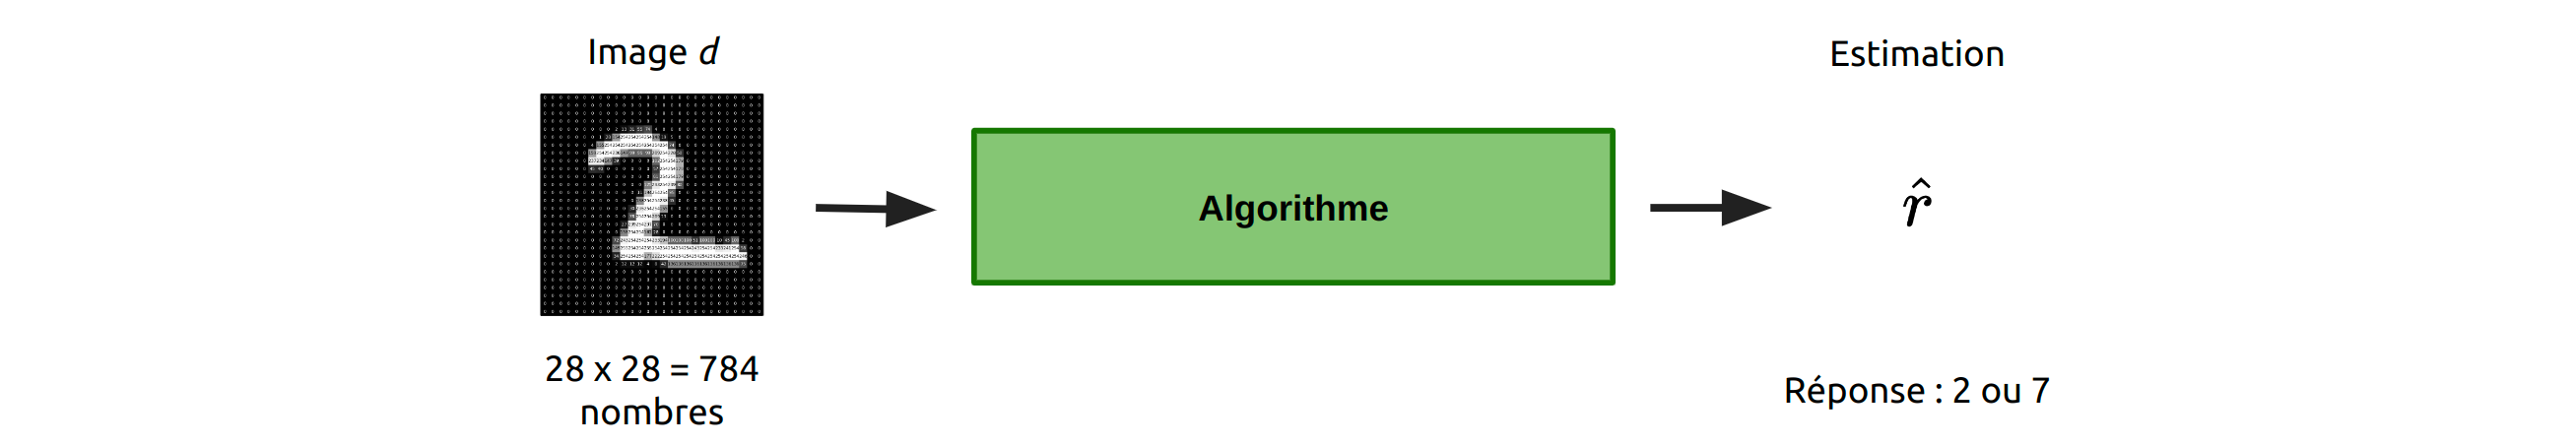  
Plusieurs stratégies sont possibles pour déterminer la réponse.
!!!
!!! abstract Algorithme fainéant : Répondre toujours 2.   
LucIA ne veut pas se fatiguer et propose un algorithme très simple **qui répond toujours 2**.  
Cela veut dire que peu importe l'image, l'algorithme ne "réfléchit" pas et dit juste : "Je pense que c'est une image de 2"

Voici le code de cet algorithme très simple ci-dessous. **Exécute la cellule pour passer à la suite**.
!!!


In [ ]:
import utilitaires_common

def algorithme(d):
    return 2

validation_execution_algo_fixe()

!!! tip Teste l'algorithme fainéant
**Exécute la cellule suivante** pour tester l'algorithme fainéant
!!!


In [ ]:
test_algorithme_faineant()
validation_execution_test_algorithme_faineant()

!!! question 2) Que répond l'algorithme fainéant pour ces trois images ?
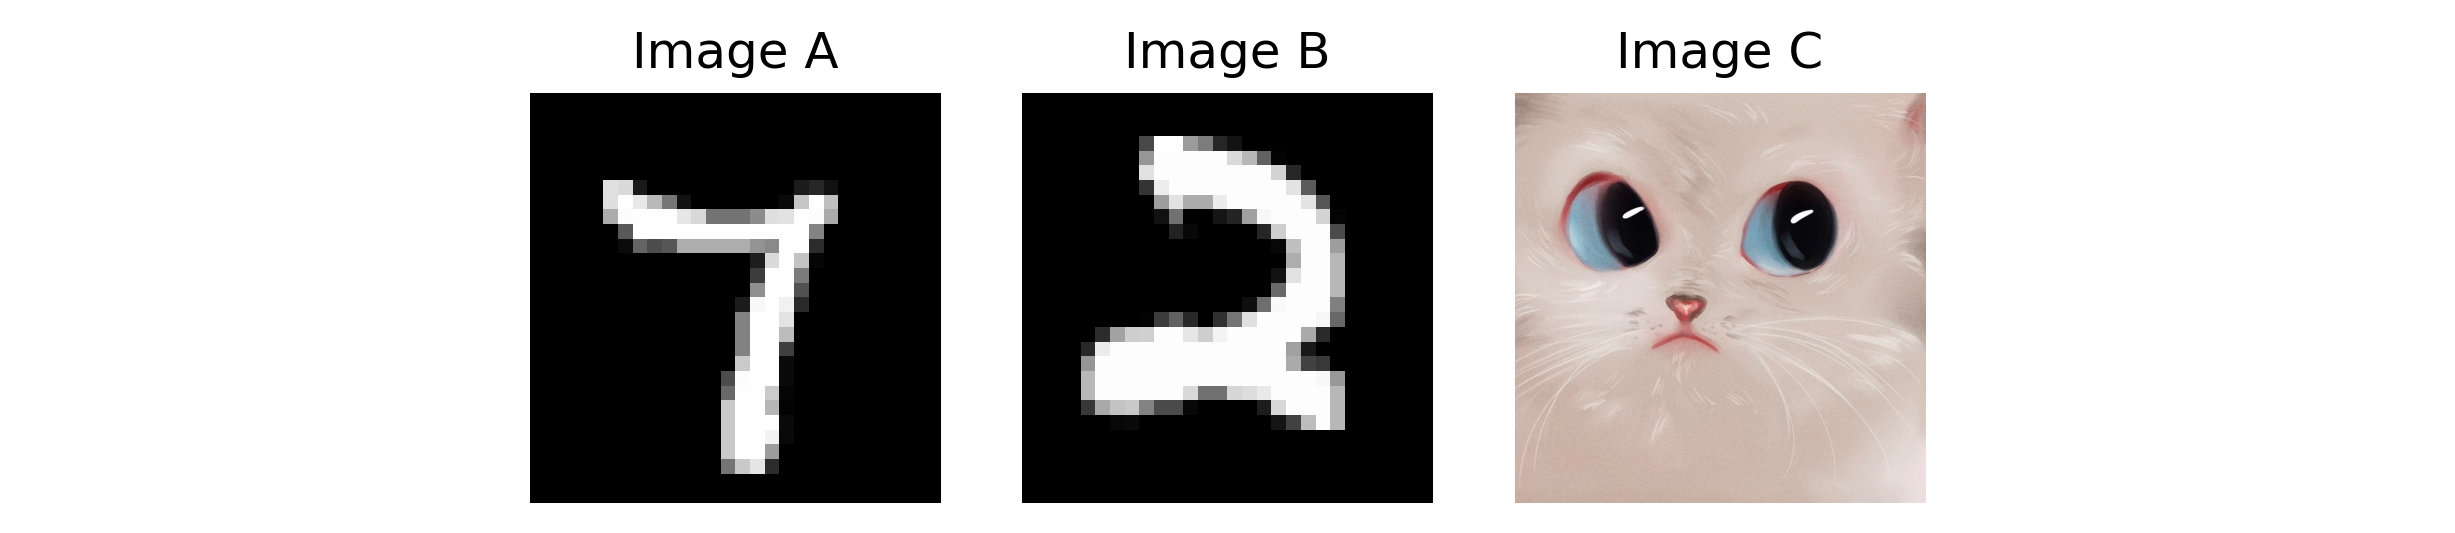  
**Remplace les `...`** dans la cellule suivante par ta réponse  **puis exécute**.  
!!!


In [ ]:
Reponse_Donnee_A = ...
Reponse_Donnee_B = ...
Reponse_Donnee_C = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_faineant()

### Le taux d'erreur


!!! info Le pourcentage d'erreur : un moyen d'évaluer ton algorithme  
Voici la formule donnant la proportion d'erreur :  
$$\text{erreur} = \frac{\text{Nombre d'images mal classées}} {\text{Nombre total d'images}}$$  
Plus la proportion d'erreur de ton algorithme est basse, meilleure est ta solution.  
!!!


In [ ]:
affichage_banque(showPredictions=True)
validation_execution_calcul_score()

!!! question 3) Sur les 10 premières images, quel est le pourcentage d'erreur de l'algorithme ?
Calcule le pourcentage d'erreur de l'algorithme sur les 10 premières images.  
**Remplace les `...`** dans la cellule suivante par ta réponse (uniquement le nombre sans le %) **puis exécute**.  
!!!

??? tip Aide calcul : exprimer une proportion en pourcentage
Une proportion peut s'écrire en pourcentage en multipliant par $100\%$.  
Par exemple, si l'algorithme fait 4 erreurs sur 20 images : $$\text{erreur} = \frac{4}{20}=0,2=0,2\times100\% = 20\%.$$  
???


In [ ]:
erreur_10 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_fixe()

!!! tip Taux d'erreur sur toutes les images  
**Exécute la cellule suivante** pour calculer le pourcentage d'erreur sur l'ensemble des 6 073 images.  
!!!


In [ ]:
calculer_score_etape_1(animation=False, banque=False)

<div id="debut-etape-data" style="height: 1px; visibility: hidden;"></div>


## B. La donnée pour l'ordinateur : image numérique


!!! abstract Qu'est-ce qu'une image ?  
Pour diminuer notre erreur, notre algorithme doit "regarder" l'image. On doit comprendre ce qu'est l'image pour l'ordinateur.  
!!!
!!! tip Calcul sur l'image  
Pour l'ordinateur, une image est un tableau de nombres. Chaque nombre correspond à un pixel de l'image. Chaque pixel vaut entre 0 et 255, 0 pour noir et 255 pour blanc.  
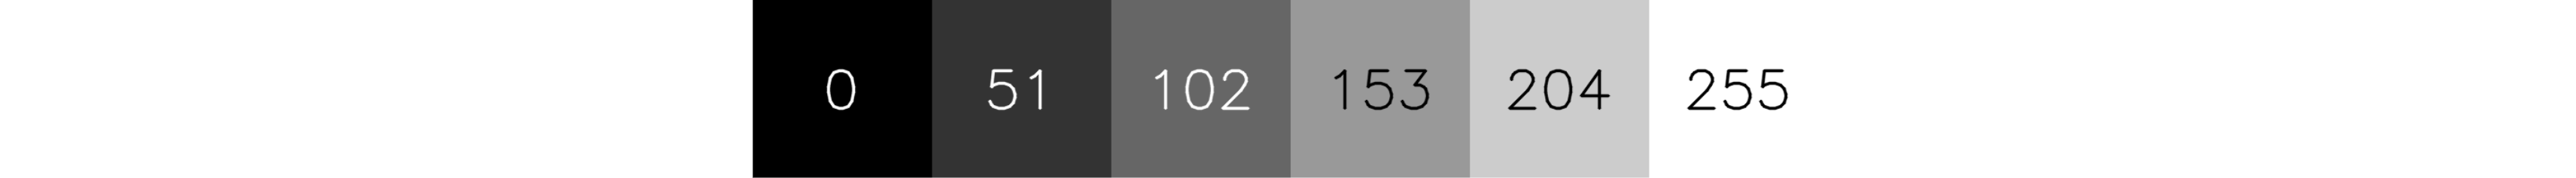  
**Exécute la cellule suivante pour voir un exemple.**  
!!!


In [ ]:
question_pixel()

!!! tip Visualisation des pixels de l'image  
**Exécute la cellule suivante** pour voir une image complète avec les valeurs de ses pixels.
!!!


In [ ]:
affichage_image_et_pixels()
validation_execution_affichage()

<div id="debut-etape-carac" style="height: 1px; visibility: hidden;"></div>


## C. Caractéristiques


### Calcul des caractéristiques


!!! tip Résumer l'image avec 2 nombres caractéristiques
Pour représenter une image par un point du plan, l'algorithme calcule deux nombres $x$ et $y$ à partir des pixels de l'image. 
Commençons par deux nombres simples : la moyenne sur la moitié haute de l'image et la moyenne sur la moitié basse.
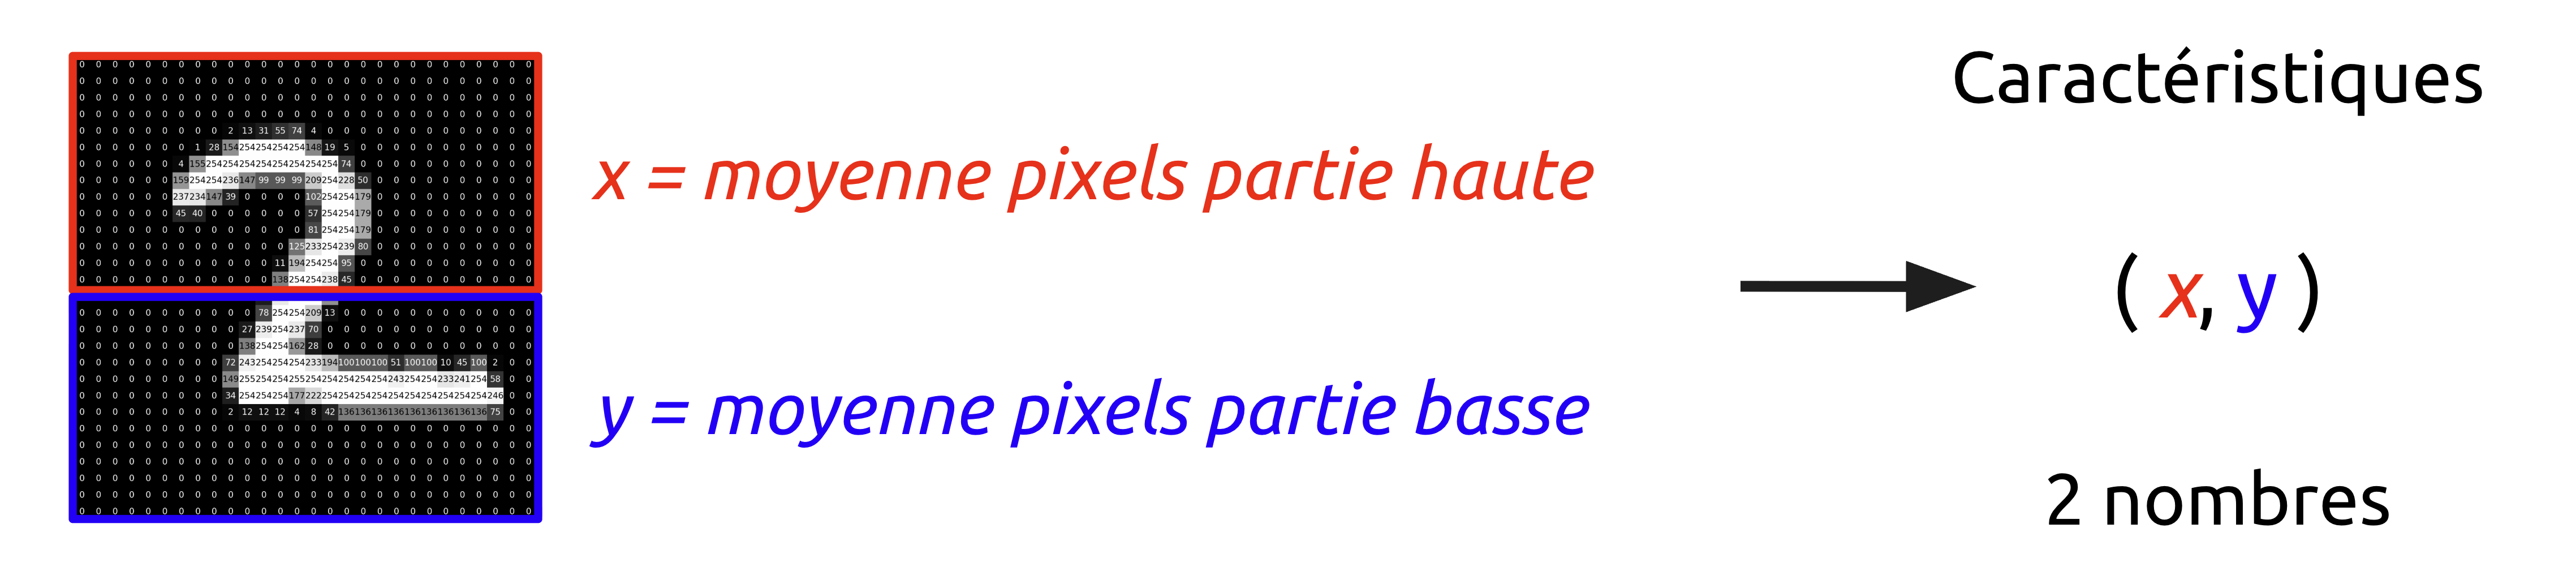
!!!


!!! question 4) Calcule les caractéristiques de ces deux images
Calcule les deux caractéristiques du 2 : $( \; \text{moyenne en haut} \; ; \; \text{moyenne en bas} \; )$.

Pour 7, les deux caractéristiques sont : 

$x_7 = \frac{5 \times 180}{9} = 100 ; \quad y_7 = \frac{3 \times 180}{9} = 60.$ <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">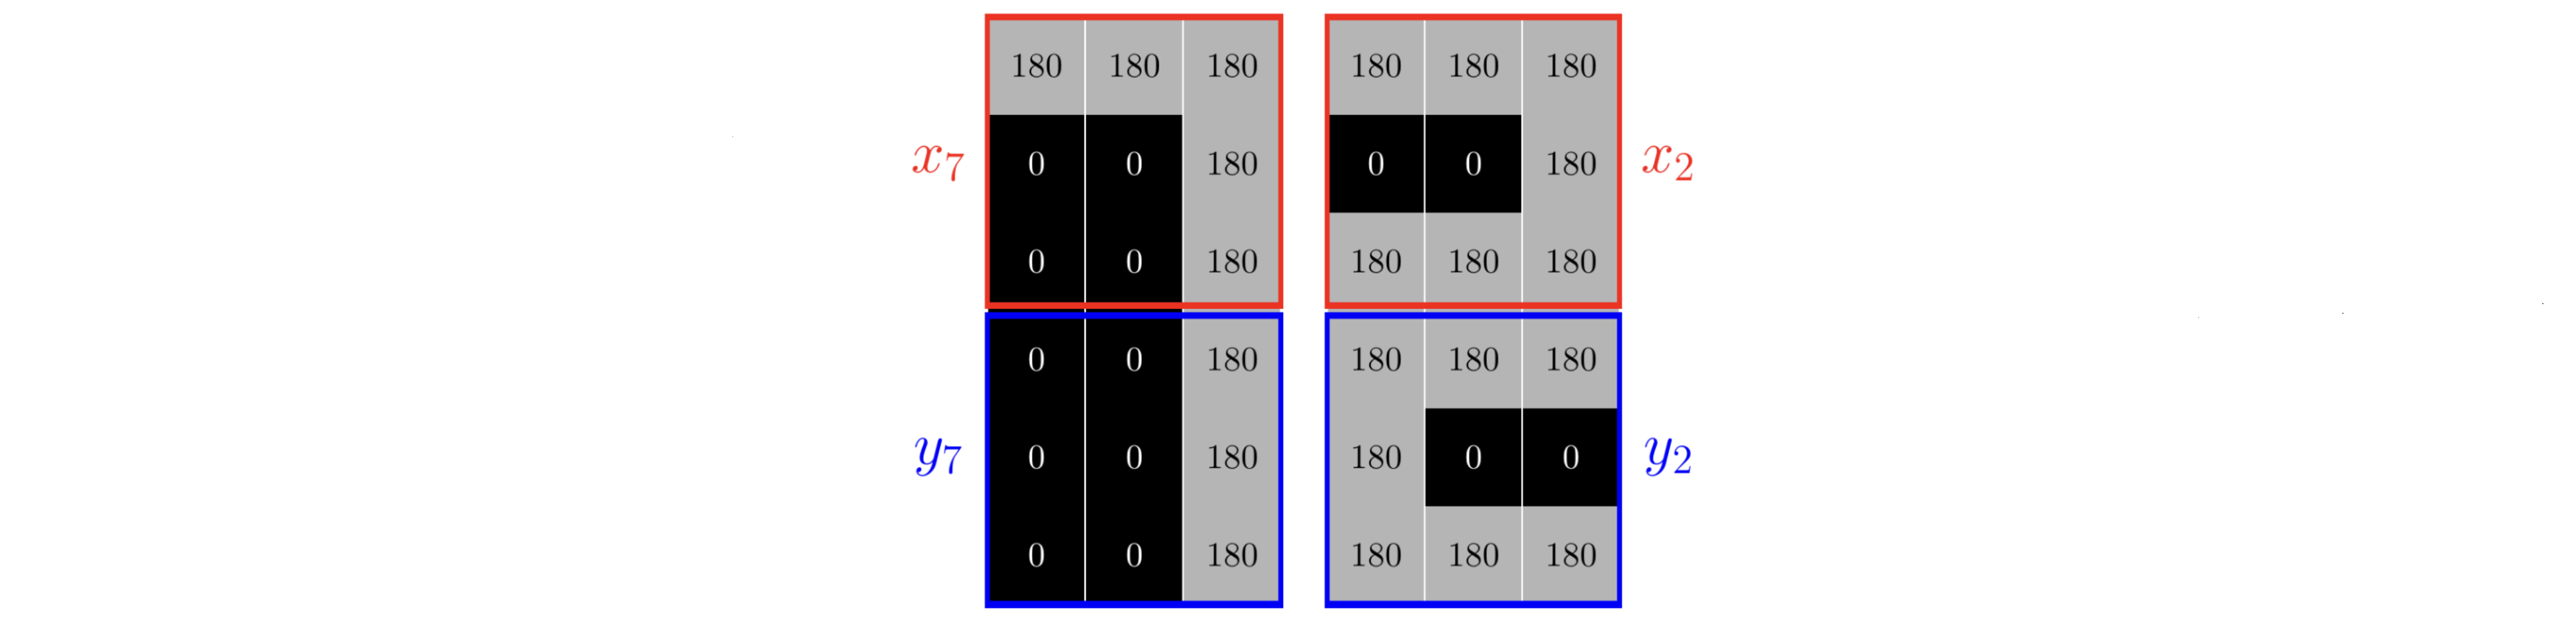</span>

**Remplace les `...`** dans la cellule suivante par les valeurs des deux caractéristiques, **puis exécute**.
!!!


??? example Pour le calcul mental : $180=20 \times 9 $ et $20=2 \times 10$ 
???


In [ ]:
x_2 = ...
y_2 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_carac()

### Visualisation dans le plan


!!! info Visualisation dans le plan  
Nous avons maintenant deux valeurs $(x ; y)$ associées à chaque image. Nous pouvons placer les images dans un plan en utilisant $x$ et $y$ comme coordonnées.

**Exécute la cellule suivante** pour poursuivre.
!!!


In [ ]:
placer_2_points()
validation_execution_placer_2_points()

!!! question 5) Place les points A et B dans le plan
Voici le couple de caractéristiques  $(x ; y)$ pour deux petites images A et B ci-dessus. Clique sur le graphique au bon endroit pour placer les points $A$ et $B$ avec leurs coordonnées.

**Exécute la cellule suivante** après avoir observé les points.
!!!


In [ ]:
validation_placer_2_points()

!!! info Nuages de points  
Nous allons maintenant étudier la répartition dans le plan des images de 2 et des images de 7. Plus notre caractéristique est discriminante, plus on peut observer 2 nuages (groupes) de points distincts  
**Exécute la cellule suivante** pour afficher les points correspondant aux 200 premières images de l'ensemble d'entraînement.  
!!!


In [ ]:
tracer_200_points()
validation_execution_200_points()

!!! question 6) Quel nuage de points correspond à quelle classe d'image ?
À ton avis, les points de couleur bleue correspondent aux images de 2 ou aux images de 7 ?  
**Remplace les `...`** dans la cellule suivante avec 2 ou 7 dans le bon ordre **puis exécute**  
!!!


In [ ]:
classe_points_bleus = ...
classe_points_oranges = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_couleur()

<div id="debut-etape-classif" style="height: 1px; visibility: hidden;"></div>


## D. Classification


!!! abstract Classification  
La classification est la dernière étape de l'algorithme. Il faut trouver un moyen de donner une réponse 2 ou 7 à partir des caractéristiques $x, y$.  
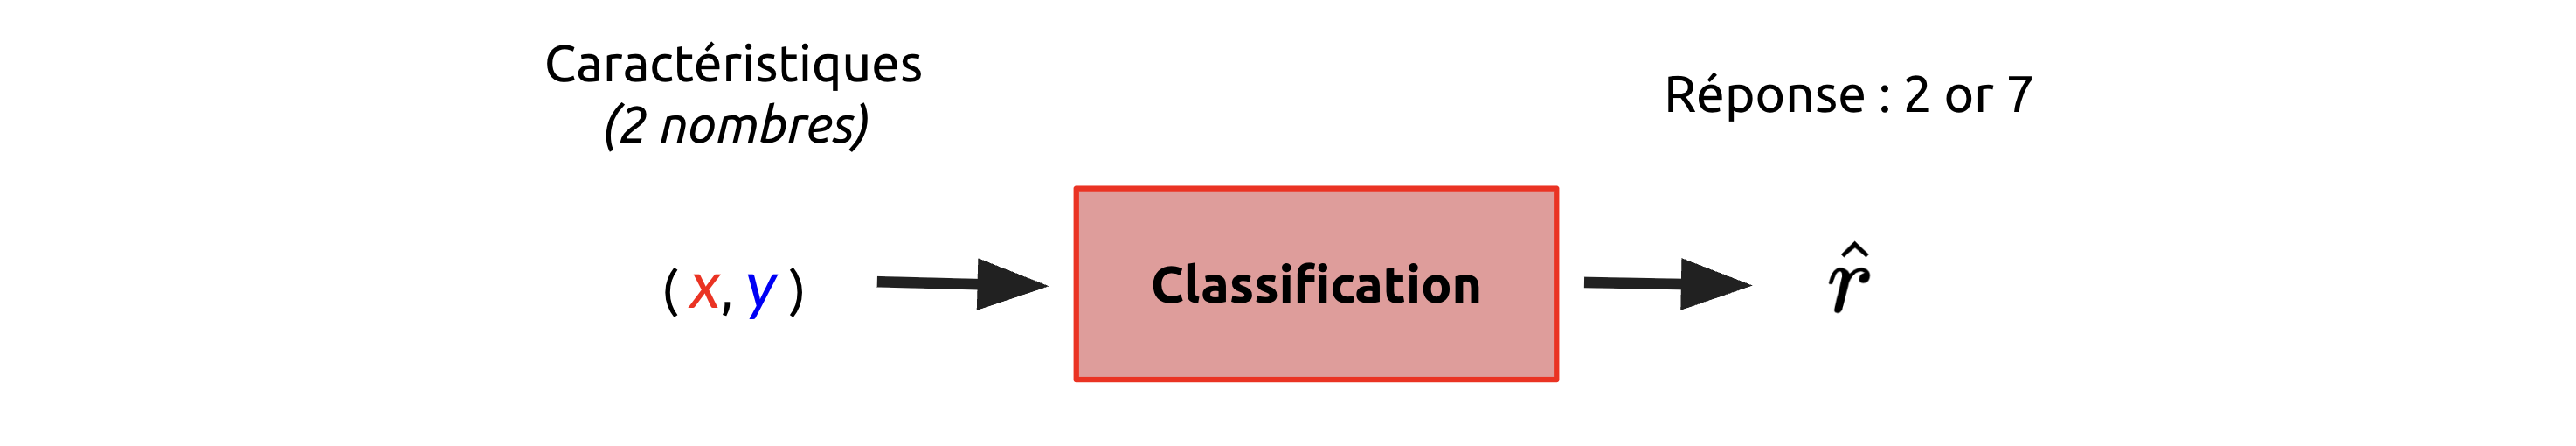  
!!!

!!! tip À quel nuage de points appartient un point donnée ?  
Certains points sont plus simples à classer que d'autres.  
  
**Exécute la cellule suivante** pour visualiser les caractéristiques de l'ensemble des données et trois points qu'on a sélectionné.  
!!!


In [ ]:
tracer_6000_points()
validation_execution_tracer_6000_points()

!!! question 7) À quelle classe appartient chacun des trois points ?
**Remplace les `...`** dans la cellule suivante par ta réponse ( 2 ou 7 ) **puis exécute**.  
!!!


In [ ]:
classe_point_A = ...
classe_point_B = ...
classe_point_C = ...

validation_question_classes()

!!! tip Classification par rapport aux points de référence  
On vient de remarquer que ce n'est pas toujours facile de savoir à quelle classe appartient un point. Contrairement à nous, l'ordinateur ne peut pas deviner visuellement, il utilise un algorithme :   
- on calcule pour chaque classe son **point moyen**, c'est-à-dire la moyenne des coordonnées des points appartenant à cette classe ;  
- la classe d'un point est celle du point moyen dont il est le plus proche en **distance**.  
Avant passer à la classification de nos données, commençons par mieux comprendre les points moyens et les distances.  
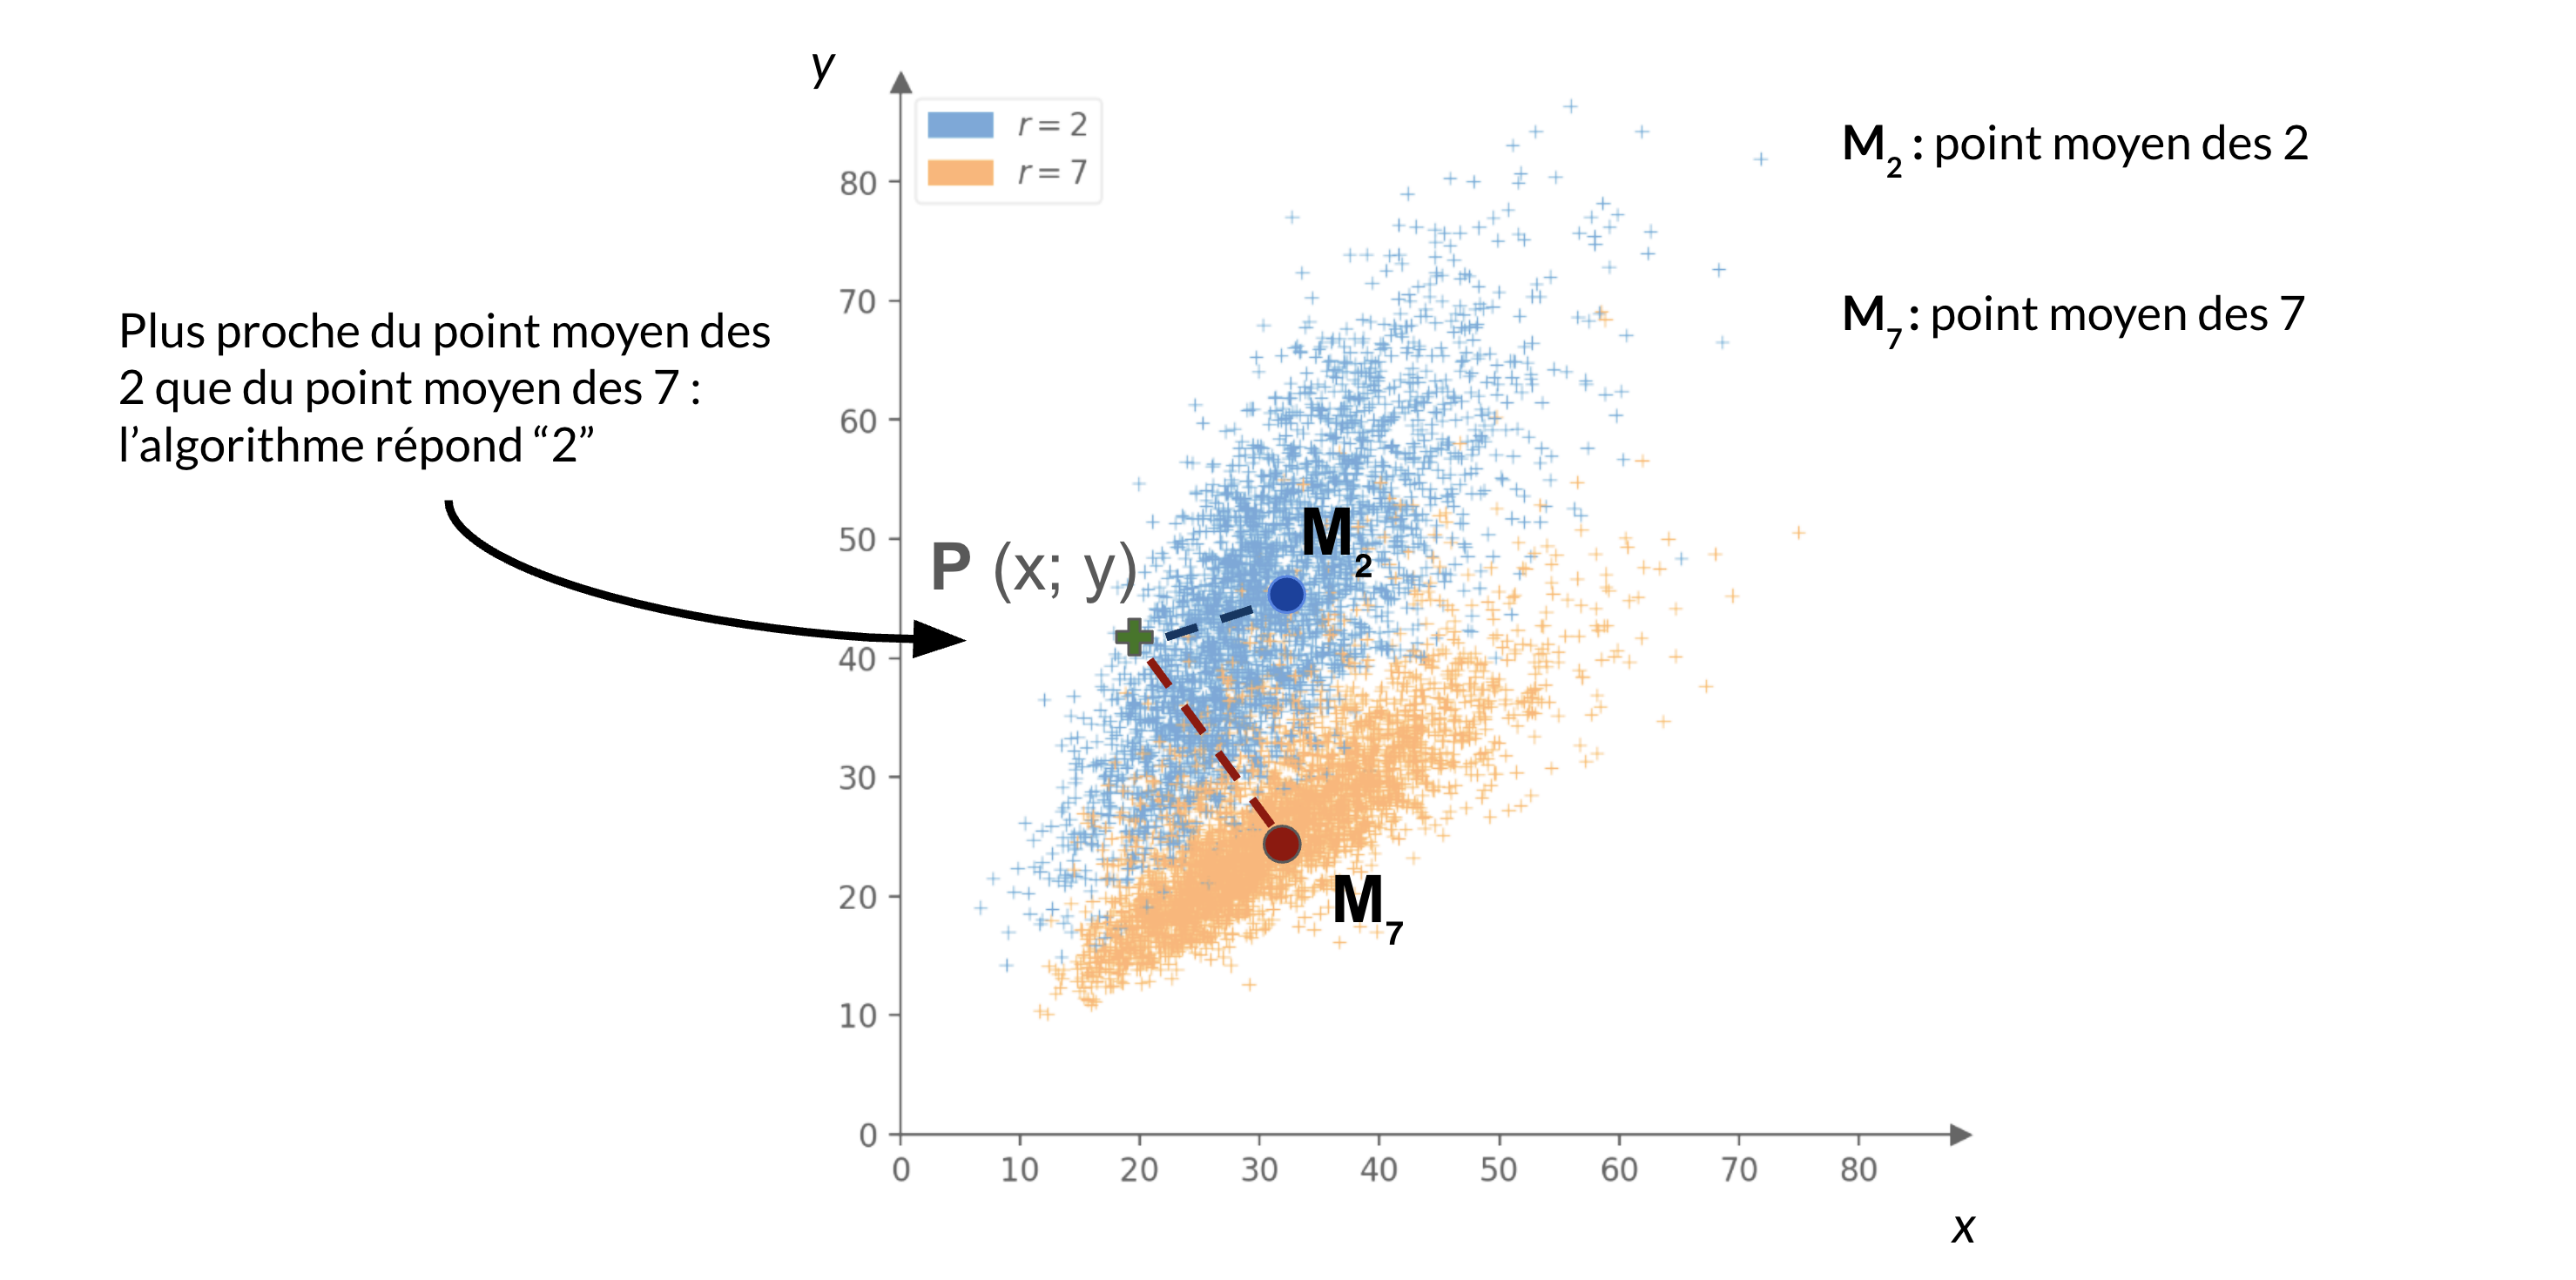  
!!!


### Mieux comprendre les point moyens et les distances


!!! tip Déplacement du point moyen  
Pour mieux comprendre les points moyens, on explore leur comportement lorsqu'un point se déplace. On regarde d'abord les cas du point moyen pour <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">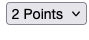</span>, <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">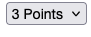</span> et <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">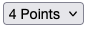</span>.  
Sur la figure suivante, tu peux déplacer les points pour voir comment se déplace le point moyen. Tu peux à tout moment  utiliser le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">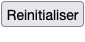</span> pour revenir à la configuration initiale.  
!!!


In [ ]:
afficher_manip_points_moyens()
validation_execution_afficher_manip_points_moyens()

!!! question 8) Quel est le déplacement horizontal du point moyen ?
Dans chacune des configurations à <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">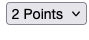</span>, <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">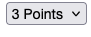</span> et <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">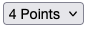</span>, de combien d'unités le point moyen se déplace-t-il dans la même direction si :  
1. Le point $B$ se déplace de 3 unités vers la droite ?  
  
**Remplace les `...`** dans la cellule suivante par ta réponse au centième près **puis exécute**.  
!!!


In [ ]:
# POUR 2 POINTS
deplacement_horizontal_2 = ...

# POUR 3 POINTS
deplacement_horizontal_3 = ...

# POUR 4 POINTS
deplacement_horizontal_4 = ...


# NE PAS TOUCHER APRES CETTE LIGNE
validation_deplacement_horizontal()

!!! question 9) Quel est le déplacement vertical du point moyen ?
Pour chaque nombre de points, de combien d'unités le point moyen se déplace-t-il dans la même direction si :  
2. Le point $B$ se déplace de 6 unités vers le haut ?  
  
**Remplace les `...`** dans la cellule suivante par ta réponse au centième près **puis exécute**.  
!!!


In [ ]:
# POUR 2 POINTS
deplacement_vertical_2 = ...

# POUR 3 POINTS
deplacement_vertical_3 = ...

# POUR 4 POINTS
deplacement_vertical_4 = ...


# NE PAS TOUCHER APRES CETTE LIGNE
validation_deplacement_vertical()

??? example Envie de plus de détails ? Clique ici.

Le point moyen $M$ de trois points $A$, $B$, $C$ a pour coordonnées :  
$$x_M = \frac{x_A + x_B + x_C}{3}, \: \frac{y_A + y_B + y_C}{3}.$$  
Si n'importe lequel des trois points se déplace de 3 unités vers la droite, que la coordonnée $x_M$ du point $M$ augmente de $\frac{3}{3}=1$. Autrement dit, $M$ se déplace d'une unité vers la droite.  
Quel effet sur le point moyen aurait le déplacement de 3 unités vers la droite d'un seul point parmi $n$ points ?
???


!!! info Distances par rapport aux points moyens  
Nous allons explorer maintenant la notion de distance d'un point $P$ par rapport à deux points moyens $A$ et $B$ correspondant aux classes 2 et 7.  
  
**Exécute la cellule suivante** pour afficher le point $P$ associé à une image, ainsi que les deux points moyens utilisés pour la classification.  
!!!


In [ ]:
afficher_manip_distance(True)

validation_execution_afficher_manip_distance()

!!! question 10) Quelles sont les distances aux points moyens ?
1) Détermine les valeurs des distances $AP$ et $BP$ au centième près.  
 2) À l'aide de ces distances propose une classe pour le point $P$ (2 ou 7).  
  
**Remplace les `...`** dans la cellule suivante par tes résultats **puis exécute**.  
!!!


In [ ]:
# Distances entre P et les points moyens :
AP = ... 
BP = ... 

# Classe de P : 2 ou 7 ?
classe_P =  ...


# NE PAS TOUCHER APRES CETTE LIGNE
validation_distance_point_moyen()

!!! info Chercher des points à égale distance des deux point moyens  
Le point $P$ est maintenant mobile.  
Déplace-le pour repérer les positions où $AP = BP$, c'est-à-dire où la distance à chaque point moyen est la même.  
  
**Exécute la cellule suivante** pour trouver des points équidistants de $A$ et $B$.  
!!!


In [ ]:
afficher_manip_distance()

validation_execution_afficher_manip_distance_2()

!!! question 11) À quelle position est-on à égale distance des deux points moyens ?
Identifie trois positions distinctes de P de coordonnées entières telles que $AP = BP$.  
  
**Remplace les `...`** dans la cellule suivante par les coordonnées $(x,y)$ de ces trois positions.  
!!!


In [ ]:
# Coordoonées de trois points à équi-distance de A et B
# Les trois points doivent être différents

point_1 = ( ... , ... )
point_2 = ( ... , ... )
point_3 = ( ... , ... )

validation_recherche_mediatrice()

??? example Pour aller plus loin  

Quel objet géométrique obtient-on en rassemblant tous les points $P$ situés à la même distance des deux points moyens ?  
Cette question est intéressante, car elle nous révèle comment découper le plan en deux zones pour la classification.
???


### Classification par points moyens


!!! abstract Classification de 10 points  
Maintenant, on peut mieux comprendre notre algorithme :  
- *Calculer* le **point moyen** de chaque classe : moyenne des coordonnées de ses points.  
- Pour un nouveau point, *mesurer* la **distance** à chacun de ces points moyens.  
- *Attribuer* à ce point la classe correspondant au point moyen *le plus proche*.  
  
**Exécute la cellule suivante** pour visualiser la classification avec 10 images.  
!!!


In [ ]:
tracer_10_points_centroides()
validation_execution_10_points()

!!! question 12) Quel est le pourcentage d'erreur sur ce schéma pour ces 10 images ?
Calcule le pourcentage d'erreur pour ces 10 images en utilisant les points moyens.  
 Remarque :   
a. Lors du survol, la distance par rapport à chaque point de référence est affichée.  
b. Les points les plus proches du point de référence de la classe 2 sont classés comme 2, tandis que ceux plus proches du point de référence de la classe 7 sont classés comme 7.  
**Remplace les `...`** dans la cellule suivante par ta réponse (uniquement le nombre sans le %) **puis exécute**.  
!!!


In [ ]:
erreur_10 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_droite()

!!! info Découpage du plan par rapport aux points de référence  
**Exécute la cellule suivante** pour visualiser la droite médiatrice obtenue à partir de points moyens pour 10 images.  
  
Ce schéma aurait-il facilité la classification précédente ?  
Déplace les points pour explorer les variations des points moyens et leur impact sur la médiatrice.  
!!!


In [ ]:
tracer_10_points_droite()
validation_execution_10_points_droite()

!!! tip Visualisation de la classification par des points de référence  
Tu vas maintenant visualiser les points moyens et la droite médiatrice pour résoudre le challenge.  
Est-ce que l'erreur est satisfaisante ?  
  
**Exécute la cellule suivante** pour afficher les points pour toutes les images de la base de données.  
!!!


In [ ]:
tracer_points_centroides(droite = True)

validation_execution_tracer_points_centroides()

<div id="debut-etape-custom" style="height: 1px; visibility: hidden;"></div>


## E. Trouvons 2 meilleures caractéristiques !


!!! info Comment choisir des bonnes caractéristiques ?
Avant, on utilisait comme caractéristiques les moyennes des zones du haut et du bas de l’image. Maintenant, on va faire pareil, mais avec d’autres zones.

On choisira deux zones identiques pour toutes les images. Pour qu’elles donnent de meilleures caractéristiques, elles doivent être bien placées pour représenter la forme de nos deux chiffres.

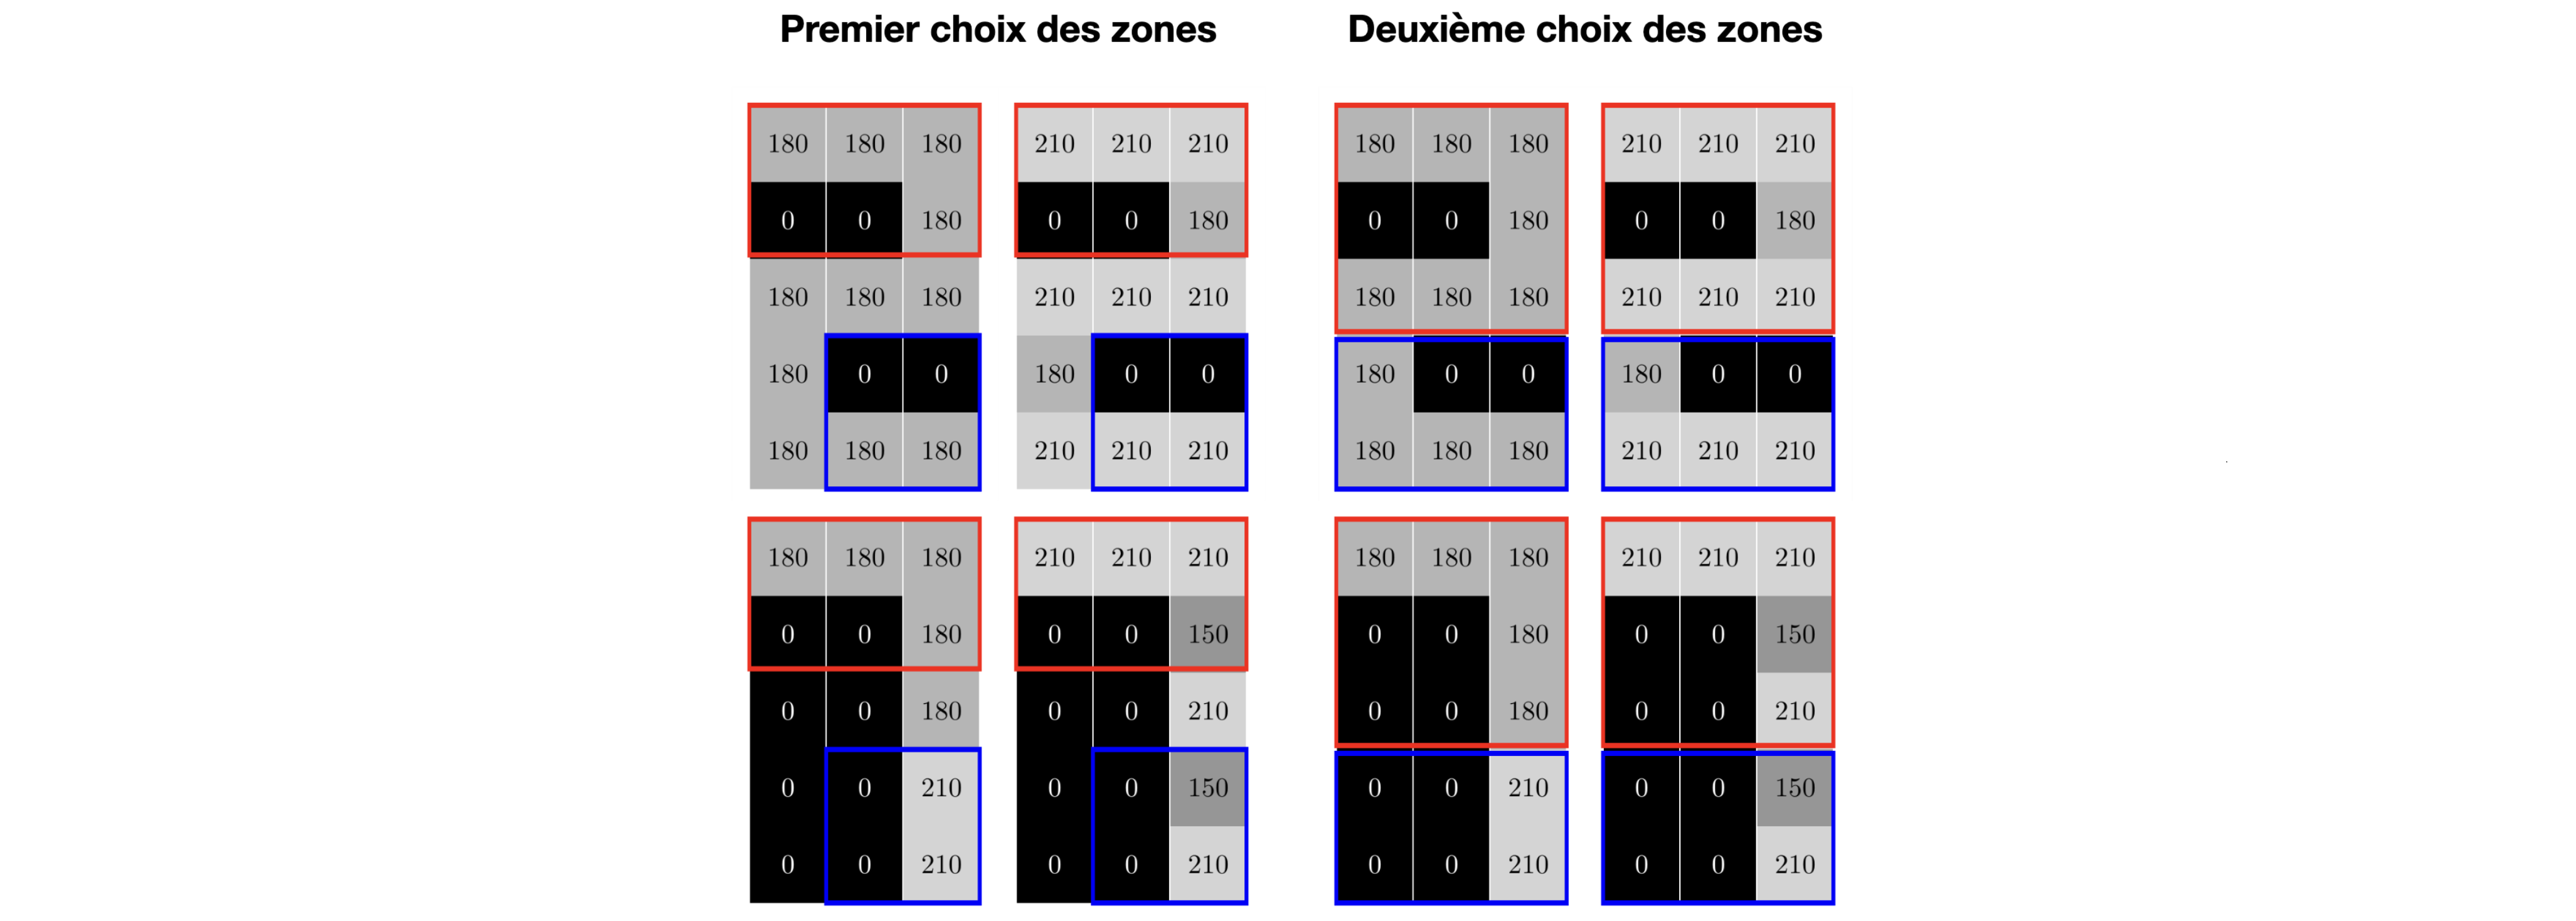

!!!

!!! question 13) Quelles zones choisir ?
Voici deux choix de zones pour différencier un 2 d’un 7. En observant les zones entourées, lequel permet le mieux de distinguer ces deux chiffres ?

Rappelle-toi : on calcule la moyenne des pixels de chaque zone pour obtenir un point par image et on cherche des nuages de points bien séparés.

**Executez la cellule suivante** pour faire ton choix dans le QCM.
!!!


In [ ]:
# EXECUTE CETTE CELLULE

qcm_choix_caracteristiques()

!!! question 14) Exemple de mauvaises caractéristiques
Dans la suite, on traite le premier choix des zones (images de gauche).

**Executez la cellule suivante** pour afficher les régions et place sur le graphique les points correspondant aux images.
!!!


In [ ]:
mauvaises_caracteristiques()

validation_execution_mauvaises_caracteristiques()

In [ ]:
validation_moyenne_carac_mauvaise()

!!! question 15) Exemple de meilleures caractéristiques
Maintenant, on traite le deuxième choix des zones (à droite).

**Executez la cellule suivante** pour afficher les nouvelles régions et place sur le graphique les points correspondant aux nouvelles caractéristiques.
!!!


In [ ]:
meilleures_caracteristiques()

validation_execution_meilleures_caracteristiques()

In [ ]:
validation_moyenne_carac_meilleure()

### Trouve tes propres caractéristiques


!!! question 16) Changer les zones choisies pour définir tes propres caractéristiques
**Exécute la cellule suivante** puis sélectionne deux zones sur l'image. Les caractéristiques $x$ et $y$ seront la moyenne des pixels dans chacune des zones.  
Clique sur le bouton zone x ou zone y pour choisir la zone à sélectionner, puis clique sur l'image et laissez appuyé jusqu'à avoir selectionné la zone souhaitée.  
!!!


In [ ]:
afficher_customisation()

validation_execution_afficher_customisation()

!!! question 17) Trouve des meilleurs zones pour les caractéristiques
Modifie les zones qui définissent les caractéristiques afin de définir des points de référence optimaux. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite médiatrice.   
Ajuste les zones de calcul pour les caractéristiques pour obtenir deux points de référence qui minimisent cette erreur.  
  
**Exécute la cellule suivante** pour finir le notebook dès que le pourcentage d'erreur sera inférieur à 10%.  
!!!


??? warning SOS : Rien ne se passe ? Clique ici

    Avec la souris sélectionne une zone dans une des images :   
    - clique sur zone 2    
    - sélectionne une zone   
    - clique sur zone 1  
    - sélectionne une zone  
      
    L'enjeu est de trouver des zones permettant de différencier les 2 et les 7.
???


In [ ]:
calculer_score_custom_droite()

!!! abstract Fin du Notebook  
Dans ce TP, tu as :   
  
- Utilisé deux caractéristiques pour chaque image ;  
- Placé les images dans un plan en utilisant ces deux valeurs comme coordonnées ;  
- Classifié en fonction de la distance par rapport aux points de référence ;  
- Ajusté les zones pour calculer les caractéristiques et ainsi optimiser la classification et minimiser ton erreur.  
  
Continue à chercher des bonnes zones pour diminuer ton pourcentage d'erreur. Tu peux faire jusqu'à moins de 5% d'erreur !  
!!!


## Bravo tu as découvert la classification avec une caractéristique. 
